In [1]:
%pylab inline
from scipy.optimize import curve_fit
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


###Define lorenz function 

In [3]:
def lorenz(x, amp,x0, gamma):
    return amp *  (1/2*gamma)**2/ ((x-x0)**2 + (1/2*gamma)**2)

### Construct 2D data with shifts of line in units if $\gamma$ vs second line detuning and linewidth

In [4]:
n, w = mgrid[1:200:5, 1:20:0.5]
res = zeros(n.shape)
x = linspace(-100,100,1000)
for i,nn in enumerate(n[:,0]):
    for j,ww in enumerate(w[0]):
        y = lorenz(x,1,0,20) + lorenz(x,1,nn*20,ww*20)  #20 linewidth of principal line
        popt_x, pcov_x = curve_fit(lorenz, x, y, p0=(1,0,20))
        res[i,j] = popt_x[1]/20

In [13]:
# Configure font size of Numbers on the plot
matplotlib.rcParams.update({'font.size': 6, 'text.usetex': True})

### Plotting 

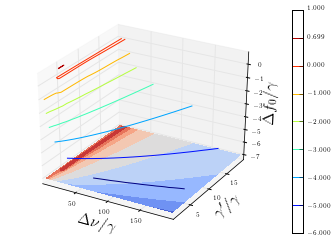

In [27]:
fig = plt.figure()
ax = fig.gca(projection='3d')
X = n
Y = w
Z = log10(res)
# #D plot
surf = ax.contour(X, Y, Z,levels=log10((1e-6,1e-5,1e-4,1e-3,0.01,0.1,1,5,10)))
# projection plot
# using similar line as below other projections can be constructed
cset = ax.contourf(X, Y, Z, zdir='z', offset=-7, cmap=cm.coolwarm)
ax.clabel(cset, fontsize=8, inline=1)
fig.colorbar(surf)
ax.set_xlabel(r'$\Delta\nu/\gamma$',size=16)
ax.set_ylabel(r"$\gamma'/\gamma$",size=16)
#ax.set_xlim(-40, 40)
#ax.set_ylabel('w')
#ax.set_ylim(-40, 40)
ax.set_zlabel(r'$\Delta f_0/\gamma$',size=16)
# to save image in any format just uncomment line below and choose extension
# fig.savefig('line_pulling.png')

### Shift of linecenter for our parameters 

In [91]:
x = linspace(-100,100,1000)
# points = []
# for n in (10, 50, 100, 500, 1000):
#     for w in (1, 5, 10, 20, 50 ,100):
y = lorenz(x,1,0,20) + lorenz(x,1,500*20,10*20)
popt_x, pcov_x = curve_fit(lorenz, x, y, p0=(1,0,20))
print(popt_x[1]/20)
#plot(x,y)

3.58986671027e-07
